In [1]:
# EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting (if using JupyterLab/Notebook)
%matplotlib inline

# ========== 1. Load the Dataset ==========
# Adjust the file path if necessary
file_path = '../data/raw/LD2011_2014.txt'
df = pd.read_csv(
    file_path, 
    sep=';',         # The file uses semicolons as separators
    decimal=',',     # Some versions of the file use commas for decimals
    index_col=0,     # Treat the first column as the DateTime index
    parse_dates=True # Parse the index as DateTime
)

print("DataFrame shape:", df.shape)
print(df.head())
print(df.info())

# ========== 2. Basic Checks & Missing Values ==========
print("Missing values per column:\n", df.isnull().sum())

# Verify the time index is equally spaced (15-minute intervals)
time_diffs = df.index.to_series().diff().value_counts()
print("\nFrequency of time intervals:\n", time_diffs.head())

DataFrame shape: (140256, 370)
                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   

                     MT_364  MT_365  

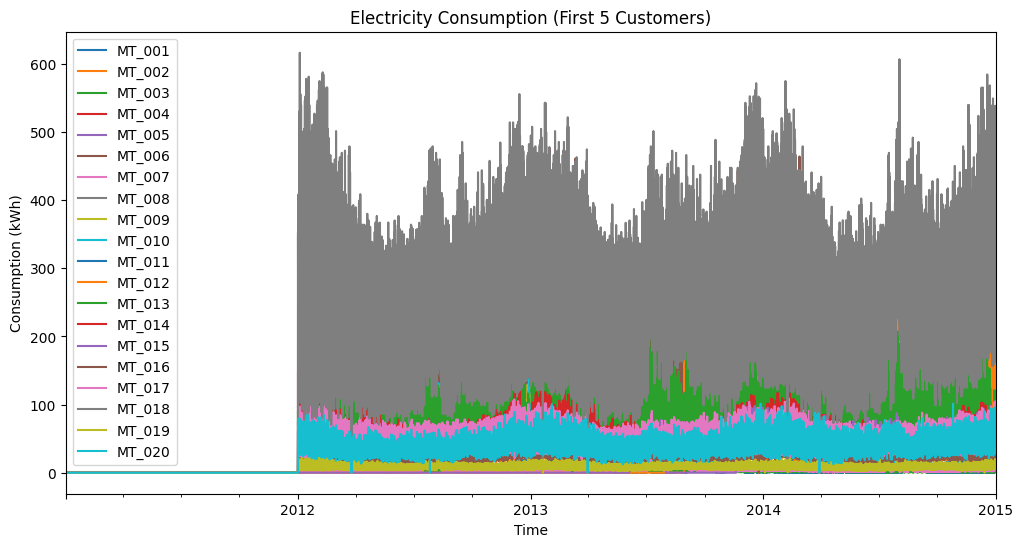

In [14]:
# ========== 3. Visualize a Subset of Columns ==========
# Plot first 5 columns to get an overview
df_subset = df.iloc[:, :20]  # Columns MT_001 through MT_005
plt.figure(figsize=(12, 6))
df_subset.plot(ax=plt.gca())
plt.title('Electricity Consumption (First 5 Customers)')
plt.xlabel('Time')
plt.ylabel('Consumption (kWh)')
plt.show()

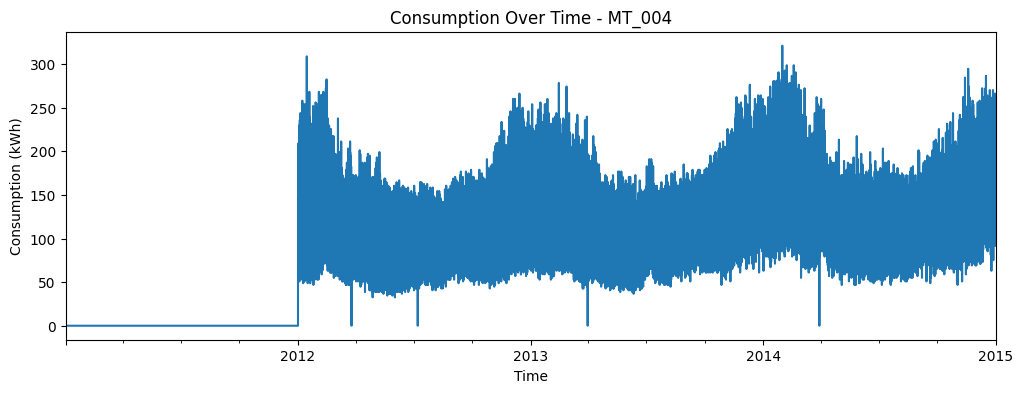

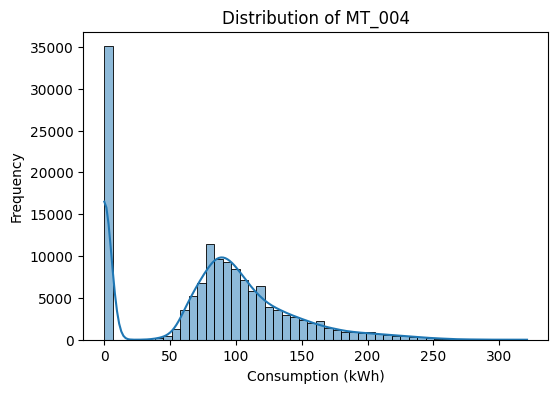

In [15]:

# ========== 4. Single Column Exploration ==========
# Let's pick one column (e.g., MT_001) and plot over entire period
col_name = 'MT_004'
plt.figure(figsize=(12, 4))
df[col_name].plot()
plt.title(f'Consumption Over Time - {col_name}')
plt.xlabel('Time')
plt.ylabel('Consumption (kWh)')
plt.show()

# Distribution (histogram) of a single column
plt.figure(figsize=(6, 4))
sns.histplot(df[col_name], bins=50, kde=True)
plt.title(f'Distribution of {col_name}')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

Daily-resampled shape: (1462, 370)
            MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  MT_008  \
2011-01-01     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-02     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-03     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-04     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-05     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            MT_009  MT_010  ...  MT_361  MT_362  MT_363  MT_364  MT_365  \
2011-01-01     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-02     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-03     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-04     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
2011-01-05     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

            MT_366  MT_367  MT_368  MT_369  M

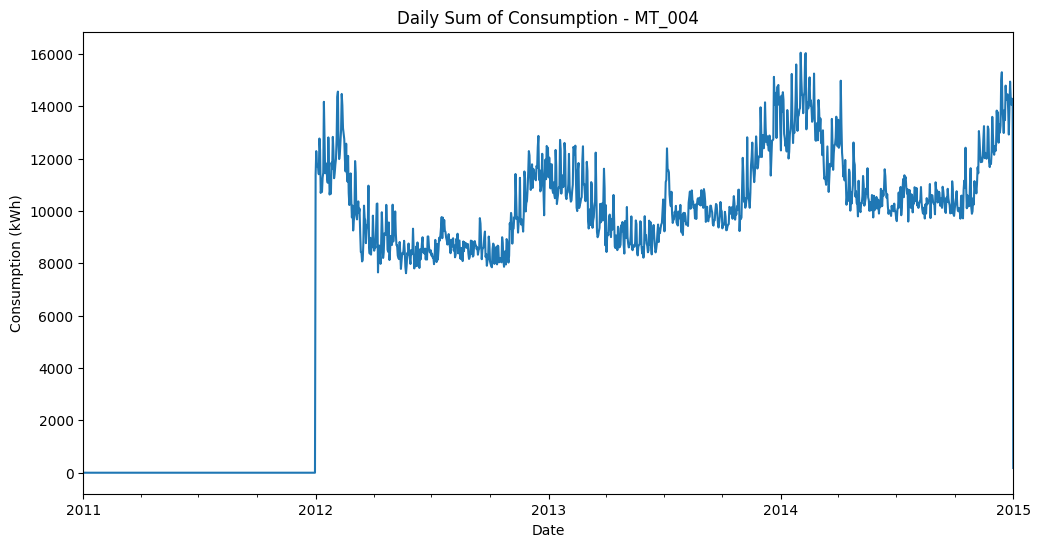

In [16]:

# ========== 5. Resample to Daily Sums ==========
# This can reveal longer-term patterns
df_daily = df.resample('D').sum() # sum to get daily consumption
print("Daily-resampled shape:", df_daily.shape)
print(df_daily.head())

plt.figure(figsize=(12, 6))
df_daily[col_name].plot()
plt.title(f'Daily Sum of Consumption - {col_name}')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.show()

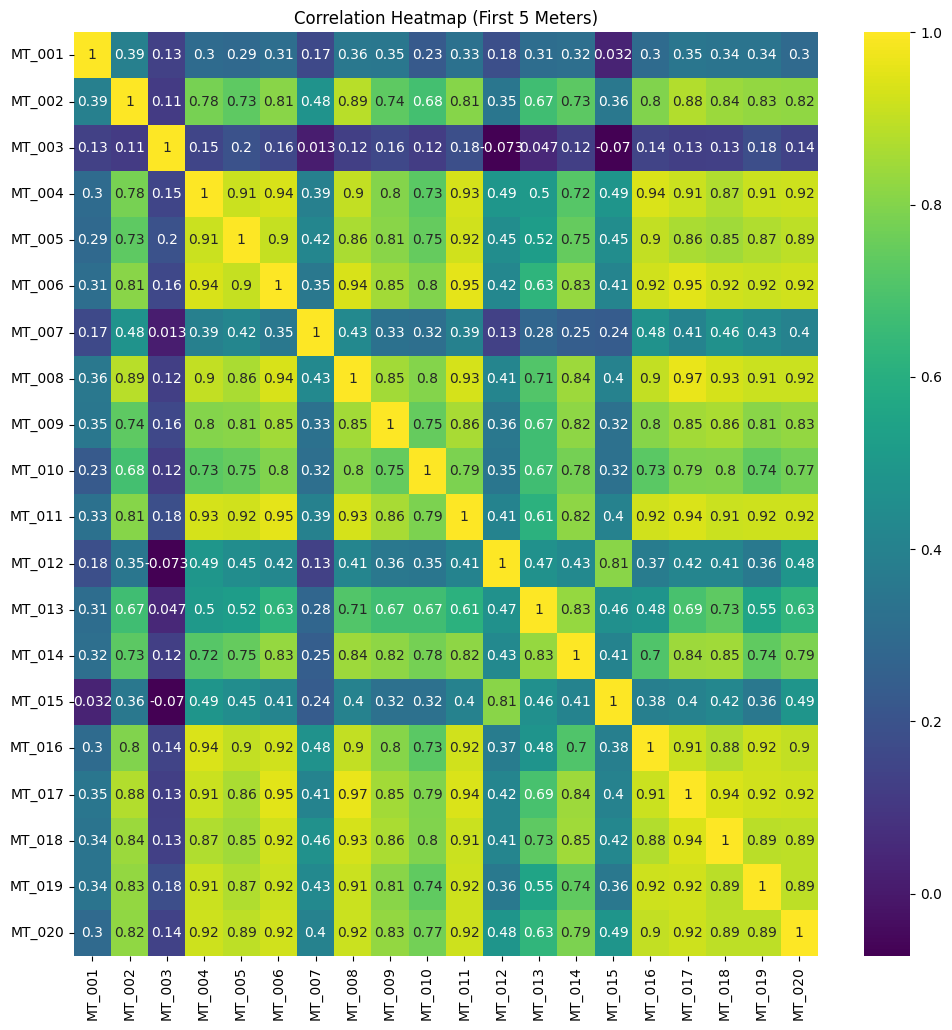

In [ ]:
# ========== 6. Correlation Among a Subset ==========
# Correlation can be large for 370 columns; let's just do first 5
corr_subset = df_subset.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_subset, annot=True, cmap='viridis')
plt.title('Correlation Heatmap (First 5 Meters)')
plt.show()

In [18]:
# ========== 7. Observations ==========
# Print any suspicious patterns (e.g., all zeros at certain times)
# Example: Check if any row is all zeros
all_zero_rows = (df == 0).all(axis=1).sum()
print(f"\nNumber of rows where ALL meters read 0 kWh: {all_zero_rows}")

print("\nEDA complete. Check the plots and logs above for insights.")


Number of rows where ALL meters read 0 kWh: 0

EDA complete. Check the plots and logs above for insights.
